### Plot Gen information for boosted tau massregression sample 

In [302]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)



In [340]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("GenHiggs_inv--------------------",ak.flatten(events.GenHiggs_inv))
        jet = ak.zip(
            {
                "GenHiggs_inv":ak.flatten(events.GenHiggs_inv),
                "H_pt":ak.flatten(events.H_pt),
                "H_eta":ak.flatten(events.H_eta),
                "H_phi":ak.flatten(events.H_phi),
                "GenA1_inv":ak.flatten(events.GenA1_inv),
                "GenA2_inv":ak.flatten(events.GenA2_inv),
                "dR_H_A1":ak.flatten(events.dR_H_A1),
                "dR_H_A2":ak.flatten(events.dR_H_A2),
                "dR_A1_A2":ak.flatten(events.dR_A1_A2),
                "dR_A1_Tau1":ak.flatten(events.dR_A1_Tau1),
                "dR_A1_Tau2":ak.flatten(events.dR_A1_Tau2),
                "dR_A2_Tau3":ak.flatten(events.dR_A2_Tau3),
                "dR_A2_Tau4":ak.flatten(events.dR_A2_Tau4),
                "dR_Tau1_Tau2":ak.flatten(events.dR_Tau1_Tau2),
                "dR_Tau3_Tau4":ak.flatten(events.dR_Tau3_Tau4),
                "A1_pt":ak.flatten(events.A1_pt),
                "Tau1_pt":ak.flatten(events.Tau1_pt),
                "Tau2_pt":ak.flatten(events.Tau2_pt),
                "A2_pt":ak.flatten(events.A2_pt),
                "Tau3_pt":ak.flatten(events.Tau3_pt),
                "Tau4_pt":ak.flatten(events.Tau4_pt),
                "A1_eta":ak.flatten(events.A1_eta),
                "Tau1_eta":ak.flatten(events.Tau1_eta),
                "Tau2_eta":ak.flatten(events.Tau2_eta),
                "A2_eta":ak.flatten(events.A2_eta),
                "Tau3_eta":ak.flatten(events.Tau3_eta),
                "Tau4_eta":ak.flatten(events.Tau4_eta),
                "A1_phi":ak.flatten(events.A1_phi),
                "Tau1_phi":ak.flatten(events.Tau1_phi),
                "Tau2_phi":ak.flatten(events.Tau2_phi),
                "A2_phi":ak.flatten(events.A2_phi),
                "Tau3_phi":ak.flatten(events.Tau3_phi),
                "Tau4_phi":ak.flatten(events.Tau4_phi),
                "Tau1_Tau2_dphi":ak.flatten(events.Tau1_Tau2_dphi),
                "Tau1_Tau2_deta":ak.flatten(events.Tau1_Tau2_deta),
                "Tau3_Tau4_dphi":ak.flatten(events.Tau3_Tau4_dphi),
                "Tau3_Tau4_deta":ak.flatten(events.Tau3_Tau4_deta),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        
        hmass = jet.GenHiggs_inv[jet.GenHiggs_inv > -22.22]
        hpt = jet.H_pt[jet.H_pt>-22.22]
        heta = jet.H_eta[jet.H_eta>-22.22]
        hphi = jet.H_phi[jet.H_phi>-22.22]
        a1mass = jet.GenA1_inv[jet.GenA1_inv > -22.22]
        a1pt = jet.A1_pt[jet.A1_pt>-22.22]
        a1eta = jet.A1_eta[jet.A1_eta>-22.22]
        a1phi = jet.A1_phi[jet.A1_phi>-22.22]
        a2mass = jet.GenA2_inv[jet.GenA2_inv > -22.22]
        a2pt = jet.A2_pt[jet.A2_pt>-22.22]
        a2eta = jet.A2_eta[jet.A2_eta>-22.22]
        a2phi = jet.A2_phi[jet.A2_phi>-22.22]
        tau1pt = jet.Tau1_pt[jet.Tau1_pt>-22.22]
        tau1eta = jet.Tau1_eta[jet.Tau1_eta>-22.22]
        tau1phi = jet.Tau1_phi[jet.Tau1_phi>-22.22]
        tau2pt = jet.Tau2_pt[jet.Tau2_pt>-22.22]
        tau2eta = jet.Tau2_eta[jet.Tau2_eta>-22.22]
        tau2phi = jet.Tau2_phi[jet.Tau2_phi>-22.22]
        tau3pt = jet.Tau3_pt[jet.Tau3_pt>-22.22]
        tau3eta = jet.Tau3_eta[jet.Tau3_eta>-22.22]
        tau3phi = jet.Tau3_phi[jet.Tau3_phi>-22.22]
        tau4pt = jet.Tau4_pt[jet.Tau4_pt>-22.22]
        tau4eta = jet.Tau4_eta[jet.Tau4_eta>-22.22]
        tau4phi = jet.Tau4_phi[jet.Tau4_phi>-22.22]
        ha1dr = jet.dR_H_A1[jet.dR_H_A1>-22.22]
        ha2dr = jet.dR_H_A2[jet.dR_H_A2>-22.22]
        a1a2dr = jet.dR_A1_A2[jet.dR_A1_A2>-22.22]
        tau1dr = jet.dR_A1_Tau1[jet.dR_A1_Tau1>-22.22]
        tau2dr = jet.dR_A1_Tau2[jet.dR_A1_Tau2>-22.22]
        tau3dr = jet.dR_A2_Tau3[jet.dR_A2_Tau3>-22.22]
        tau4dr = jet.dR_A2_Tau4[jet.dR_A2_Tau4>-22.22]
        taudr12 = jet.dR_Tau1_Tau2[jet.dR_Tau1_Tau2>-22.22]
        taudr34 = jet.dR_Tau3_Tau4[jet.dR_Tau3_Tau4>-22.22]
        dphi12 = jet.Tau1_Tau2_dphi[jet.Tau1_Tau2_dphi > -22.22]
        deta12 = jet.Tau1_Tau2_deta[jet.Tau1_Tau2_deta > -22.22]
        dphi34 = jet.Tau3_Tau4_dphi[jet.Tau3_Tau4_dphi > -22.22]
        deta34 = jet.Tau3_Tau4_deta[jet.Tau3_Tau4_deta > -22.22]
        
        
        # H mass  -----------------------------------------------------------
        
        H_mass = (
            hist.Hist.new
            .StrCat(["H mass"], name="hmass")
            .Reg(100, 124, 126, name="massh", label="Mass [GeV]")
            .Int64()
        )
        H_mass.fill(hmass="H mass", massh=hmass)


        # H pt  -----------------------------------------------------------
        
        H_pt = (
            hist.Hist.new
            .StrCat([ "H_pt"], name="hhpt")
            .Reg(100, 0, 1000, name="pt_h", label="pT [GeV]")
            .Int64()
        )
        
        H_pt.fill(hhpt="H_pt", pt_h=hpt)
        # H eta -----------------------------------------------------------
        
        H_eta = (
            hist.Hist.new
            .StrCat([ "H_eta"], name="hheta")
            .Reg(100, -5, 5, name="eta_h", label="eta")
            .Int64()
        )
        
        H_eta.fill(hheta="H_eta", eta_h=heta)
       
        # H phi -----------------------------------------------------------
        
        H_phi = (
            hist.Hist.new
            .StrCat([ "H_phi"], name="hhphi")
            .Reg(100, -3.2, 3.2, name="phi_h", label="phi")
            .Int64()
        )
        
        H_phi.fill(hhphi="H_phi", phi_h=hphi)
        
        
        # A1 mass  -----------------------------------------------------------
        
        A1_mass = (
            hist.Hist.new
            .StrCat(["A1 mass"], name="hmassa1")
            .Reg(500, 3.2, 17.2, name="massa1", label="Mass [GeV]")
            .Int64()
        )
        A1_mass.fill(hmassa1="A1 mass", massa1=a1mass)


        # A1 pt  -----------------------------------------------------------
        
        A1_pt = (
            hist.Hist.new
            .StrCat([ "A1_pt"], name="ha1pt")
            .Reg(100, 10, 300, name="pt_a1", label="pT [GeV]")
            .Int64()
        )
        
        A1_pt.fill(ha1pt="A1_pt", pt_a1=a1pt)
        # A1 eta -----------------------------------------------------------
        
        A1_eta = (
            hist.Hist.new
            .StrCat([ "A1_eta"], name="ha1eta")
            .Reg(100, -5, 5, name="eta_a1", label="eta")
            .Int64()
        )
        
        A1_eta.fill(ha1eta="A1_eta", eta_a1=a1eta)
       
        # A phi -----------------------------------------------------------
        
        A1_phi = (
            hist.Hist.new
            .StrCat([ "A1_phi"], name="ha1phi")
            .Reg(100, -3.2, 3.2, name="phi_a1", label="phi")
            .Int64()
        )
        
        A1_phi.fill(ha1phi="A1_phi", phi_a1=a1phi)
        
        # A2 mass  -----------------------------------------------------------
        
        A2_mass = (
            hist.Hist.new
            .StrCat(["A2 mass"], name="hmassa2")
            .Reg(500, 3.2, 17.2, name="massa2", label="Mass [GeV]")
            .Int64()
        )
        A2_mass.fill(hmassa2="A2 mass", massa2=a2mass)


        # A2 pt  -----------------------------------------------------------
        
        A2_pt = (
            hist.Hist.new
            .StrCat([ "A2_pt"], name="ha2pt")
            .Reg(100, 10, 300, name="pt_a2", label="pT [GeV]")
            .Int64()
        )
        
        A2_pt.fill(ha2pt="A2_pt", pt_a2=a2pt)
        # A2 eta -----------------------------------------------------------
        
        A2_eta = (
            hist.Hist.new
            .StrCat([ "A2_eta"], name="ha2eta")
            .Reg(100, -5, 5, name="eta_a2", label="eta")
            .Int64()
        )
        
        A2_eta.fill(ha2eta="A2_eta", eta_a2=a2eta)
       
        # A2 phi -----------------------------------------------------------
        
        A2_phi = (
            hist.Hist.new
            .StrCat([ "A2_phi"], name="ha2phi")
            .Reg(100, -3.2, 3.2, name="phi_a2", label="phi")
            .Int64()
        )
        
        A2_phi.fill(ha2phi="A2_phi", phi_a2=a2phi)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(100, 10, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 eta -----------------------------------------------------------
        
        Tau1_eta = (
            hist.Hist.new
            .StrCat([ "Tau1_eta"], name="htau1eta")
            .Reg(100, -5, 5, name="eta_tau1", label="Eta")
            .Int64()
        )
        
        Tau1_eta.fill(htau1eta="Tau1_eta", eta_tau1=tau1eta)
        
        # gen Tau1 phi -----------------------------------------------------------
        
        Tau1_phi = (
            hist.Hist.new
            .StrCat([ "Tau1_phi"], name="htau1phi")
            .Reg(100, -3.2, 3.2, name="phi_tau1", label="Phi")
            .Int64()
        )
        
        Tau1_phi.fill(htau1phi="Tau1_phi", phi_tau1=tau1phi)
        
        # gen Tau2 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(100, 10, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
       # gen Tau1 eta -----------------------------------------------------------
        
        Tau2_eta = (
            hist.Hist.new
            .StrCat([ "Tau2_eta"], name="htau2eta")
            .Reg(100, -5, 5, name="eta_tau2", label="Eta")
            .Int64()
        )
        
        Tau2_eta.fill(htau2eta="Tau2_eta", eta_tau2=tau2eta)
        
        # gen Tau2 phi -----------------------------------------------------------
        
        Tau2_phi = (
            hist.Hist.new
            .StrCat([ "Tau2_phi"], name="htau2phi")
            .Reg(100, -3.2, 3.2, name="phi_tau2", label="Phi")
            .Int64()
        )
        
        Tau2_phi.fill(htau2phi="Tau2_phi", phi_tau2=tau2phi)
        
        # gen Tau3 pt -----------------------------------------------------------
        
        Tau3_pt = (
            hist.Hist.new
            .StrCat([ "Tau3_pt"], name="htau3pt")
            .Reg(100, 10, 200, name="pt_tau3", label="pT [GeV]")
            .Int64()
        )
        
        Tau3_pt.fill(htau3pt="Tau3_pt", pt_tau3=tau3pt)
        
       # gen Tau3 eta -----------------------------------------------------------
        
        Tau3_eta = (
            hist.Hist.new
            .StrCat([ "Tau3_eta"], name="htau3eta")
            .Reg(100, -5, 5, name="eta_tau3", label="Eta")
            .Int64()
        )
        
        Tau3_eta.fill(htau3eta="Tau3_eta", eta_tau3=tau3eta)
        
        # gen Tau3 phi -----------------------------------------------------------
        
        Tau3_phi = (
            hist.Hist.new
            .StrCat([ "Tau3_phi"], name="htau3phi")
            .Reg(100, -3.2, 3.2, name="phi_tau3", label="Phi")
            .Int64()
        )
        
        Tau3_phi.fill(htau3phi="Tau3_phi", phi_tau3=tau3phi)
        
        # gen Tau4 pt -----------------------------------------------------------
        
        Tau4_pt = (
            hist.Hist.new
            .StrCat([ "Tau4_pt"], name="htau4pt")
            .Reg(100, 10, 200, name="pt_tau4", label="pT [GeV]")
            .Int64()
        )
        
        Tau4_pt.fill(htau4pt="Tau4_pt", pt_tau4=tau4pt)
        
       # gen Tau4 eta -----------------------------------------------------------
        
        Tau4_eta = (
            hist.Hist.new
            .StrCat([ "Tau4_eta"], name="htau4eta")
            .Reg(100, -5, 5, name="eta_tau4", label="Eta")
            .Int64()
        )
        
        Tau4_eta.fill(htau4eta="Tau4_eta", eta_tau4=tau4eta)
        
        # gen Tau4 phi -----------------------------------------------------------
        
        Tau4_phi = (
            hist.Hist.new
            .StrCat([ "Tau4_phi"], name="htau4phi")
            .Reg(100, -3.2, 3.2, name="phi_tau4", label="Phi")
            .Int64()
        )
        
        Tau4_phi.fill(htau4phi="Tau4_phi", phi_tau4=tau4phi)
        # gen H A1 dR -----------------------------------------------------------
        
        H_A1_dR = (
            hist.Hist.new
            .StrCat(["H_A1_dr"], name="hHa1jetdR")
            .Reg(100, 0.0, 10, name="Ha1jetdr", label="dR_H_A1")
            .Int64()
        )
        H_A1_dR.fill(hHa1jetdR="H_A1_dr", Ha1jetdr=ha1dr)
        # gen H A2 dR -----------------------------------------------------------
        
        H_A2_dR = (
            hist.Hist.new
            .StrCat(["H_A2_dr"], name="hHa2jetdR")
            .Reg(100, 0.0, 10, name="Ha2jetdr", label="dR_H_A2")
            .Int64()
        )
        H_A2_dR.fill(hHa2jetdR="H_A2_dr", Ha2jetdr=ha2dr)
        
        # gen A1 A2 dR -----------------------------------------------------------
        
        A1_A2_dR = (
            hist.Hist.new
            .StrCat(["A1_A2_dr"], name="ha1a2jetdR")
            .Reg(100, 0.0, 10, name="a1a2jetdr", label="dR_A1_A2")
            .Int64()
        )
        A1_A2_dR.fill(ha1a2jetdR="A1_A2_dr", a1a2jetdr=a1a2dr)
        
        # gen tau1 A dR -----------------------------------------------------------
        
        tau1_A_dR = (
            hist.Hist.new
            .StrCat(["tau1_A_dr"], name="htau1jetdR")
            .Reg(100, 0.0, 1, name="tau1jetdr", label="dR_A1_Tau1")
            .Int64()
        )
        tau1_A_dR.fill(htau1jetdR="tau1_A_dr", tau1jetdr=tau1dr)
        
        # gen tau2 A dR -----------------------------------------------------------
        
        tau2_A_dR = (
            hist.Hist.new
            .StrCat(["tau2_A_dr"], name="htau2jetdR")
            .Reg(100, 0.0, 1, name="tau2jetdr", label="dR_A1_Tau2")
            .Int64()
        )
        tau2_A_dR.fill(htau2jetdR="tau2_A_dr", tau2jetdr=tau2dr)
        
        # gen tau3 A dR -----------------------------------------------------------
        
        tau3_A_dR = (
            hist.Hist.new
            .StrCat(["tau3_A_dr"], name="htau3jetdR")
            .Reg(100, 0.0, 1, name="tau3jetdr", label="dR_A2_Tau3")
            .Int64()
        )
        tau3_A_dR.fill(htau3jetdR="tau3_A_dr", tau3jetdr=tau3dr)
        
        # gen tau4 A dR -----------------------------------------------------------
        
        tau4_A_dR = (
            hist.Hist.new
            .StrCat(["tau4_A_dr"], name="htau4jetdR")
            .Reg(100, 0.0, 1, name="tau4jetdr", label="dR_A2_Tau3")
            .Int64()
        )
        tau4_A_dR.fill(htau4jetdR="tau4_A_dr", tau4jetdr=tau4dr)
        
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus12_dR = (
            hist.Hist.new
            .StrCat(["taus12_dr"], name="htaus12dR")
            .Reg(100, 0.0, 2, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus12_dR.fill(htaus12dR="taus12_dr", tau_tau_dr=taudr12)
        
        #gen tau3 tau4 dR -----------------------------------------------------------
        
        taus34_dR = (
            hist.Hist.new
            .StrCat(["taus34_dr"], name="htaus34dR")
            .Reg(100, 0.0, 2, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus34_dR.fill(htaus34dR="taus34_dr", tau_tau_dr=taudr34)
        
        #A1 mass and pt 2D hist

        A1_mass_pt = (
            hist.Hist.new
            
            .Reg(36, 3.2, 17.2, name="massa1", label="Mass [GeV]")
            .Reg(38, 10, 200, name="pt_a1", label="pT [GeV]").Int64()
        )
        A1_mass_pt.fill(massa1=a1mass, pt_a1=a1pt)
        
        #A2 mass and pt 2D hist

        A2_mass_pt = (
            hist.Hist.new
            
            .Reg(36, 3.2, 17.2, name="massa2", label="Mass [GeV]")
            .Reg(38, 10, 200, name="pt_a2", label="pT [GeV]").Int64()
        )
        A2_mass_pt.fill(massa2=a2mass, pt_a2=a2pt)
        
        #Tau1 Tau2 deta dphi 2D hist

        tau12_deta_dphi = (
            hist.Hist.new
            
            .Reg(40, 0, 0.0174*40, name="dphi12_", label="delta_phi")
            .Reg(40, 0, 0.0174*40, name="deta12_", label="delat_eta").Int64()
        )
        tau12_deta_dphi.fill(dphi12_=dphi12, deta12_=deta12)
        
        #Tau3 Tau2 deta dphi 2D hist

        tau34_deta_dphi = (
            hist.Hist.new
            
            .Reg(40, 0, 0.0174*40, name="dphi34_", label="delta_phi")
            .Reg(40, 0, 0.0174*40, name="deta34_", label="delat_eta").Int64()
        )
        tau34_deta_dphi.fill(dphi34_=dphi34, deta34_=deta34)
        
        

        
        #----------------------------------------------------------------------------------
        
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "h_mass":H_mass,
                "h_pt":H_pt,
                "h_eta":H_eta,
                "h_phi":H_phi,
                "a1_mass":A1_mass,
                "a1_pt":A1_pt,
                "a1_eta":A1_eta,
                "a1_phi":A1_phi,
                "a2_mass":A2_mass,
                "a2_pt":A2_pt,
                "a2_eta":A2_eta,
                "a2_phi":A2_phi,
                "tau1_pt":Tau1_pt,
                "tau1_eta":Tau1_eta,
                "tau1_phi":Tau1_phi,
                "tau2_pt":Tau2_pt,
                "tau2_eta":Tau2_eta,
                "tau2_phi":Tau2_phi,
                "tau3_pt":Tau3_pt,
                "tau3_eta":Tau3_eta,
                "tau3_phi":Tau3_phi,
                "tau4_pt":Tau4_pt,
                "tau4_eta":Tau4_eta,
                "tau4_phi":Tau4_phi,
                "h_a1_dr":H_A1_dR,
                "h_a2_dr":H_A2_dR,
                "a1_a2_dr":A1_A2_dR,
                "tau1_a1_dr":tau1_A_dR,
                "tau2_a1_dr":tau2_A_dR,
                "tau3_a2_dr":tau3_A_dR,
                "tau4_a2_dr":tau4_A_dR,
                "taus12_dr":taus12_dR,
                "taus34_dr":taus34_dR,
                "a1_mass_pt":A1_mass_pt,
                "a2_mass_pt":A2_mass_pt,
                "tau12_deta_dphi":tau12_deta_dphi,
                "tau34_deta_dphi":tau34_deta_dphi,
               
                
              
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [341]:
with open("Unboosted_H_AA_4Tau_M8.json", "r") as fin:
    file_list_train1 = json.load(fin) 

fileset = {
    'unboosted_signal_M8': file_list_train1 
    
}


In [342]:
# fileset

In [343]:
# filename = "Unboosted_GenInfo_only_H_AA_4Tau_M8.root"
# file = uproot.open(filename)

# events = NanoEventsFactory.from_root(
#     file,
#     treepath='/fevt/RHTree',
#     # "RHTree",
#     entry_start=None,
#     # entry_stop=1,
#     metadata={"train_dataset_1": "jet"},
#     schemaclass=BaseSchema,
# ).events()
# p = MyProcessor()
# out = p.process(events)
# out

In [344]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=8),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    processor_instance=MyProcessor()
)
out

Output()

{'unboosted_signal_M8': {'entries': 5164,
  'h_mass': Hist(
    StrCategory(['H mass'], name='hmass'),
    Regular(100, 124, 126, name='massh', label='Mass [GeV]'),
    storage=Int64()) # Sum: 5046.0 (5164.0 with flow),
  'h_pt': Hist(
    StrCategory(['H_pt'], name='hhpt'),
    Regular(100, 0, 1000, name='pt_h', label='pT [GeV]'),
    storage=Int64()) # Sum: 5164.0,
  'h_eta': Hist(
    StrCategory(['H_eta'], name='hheta'),
    Regular(100, -5, 5, name='eta_h', label='eta'),
    storage=Int64()) # Sum: 5130.0 (5164.0 with flow),
  'h_phi': Hist(
    StrCategory(['H_phi'], name='hhphi'),
    Regular(100, -3.2, 3.2, name='phi_h', label='phi'),
    storage=Int64()) # Sum: 5164.0,
  'a1_mass': Hist(
    StrCategory(['A1 mass'], name='hmassa1'),
    Regular(500, 3.2, 17.2, name='massa1', label='Mass [GeV]'),
    storage=Int64()) # Sum: 5164.0,
  'a1_pt': Hist(
    StrCategory(['A1_pt'], name='ha1pt'),
    Regular(100, 10, 300, name='pt_a1', label='pT [GeV]'),
    storage=Int64()) # Sum: 51

Text(1, 0, 'Higgs Mass [GeV]')

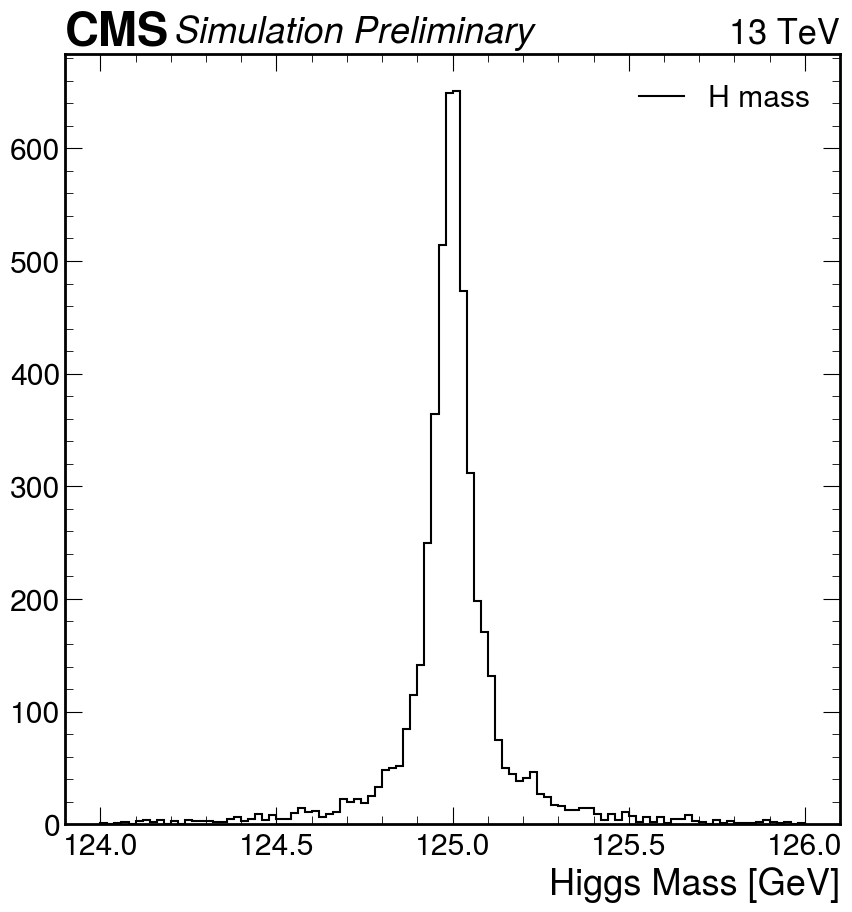

In [308]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["h_mass"].plot1d(ax=ax,histtype='step',color="black")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("Higgs Mass [GeV]")


(0.0, 400.0)

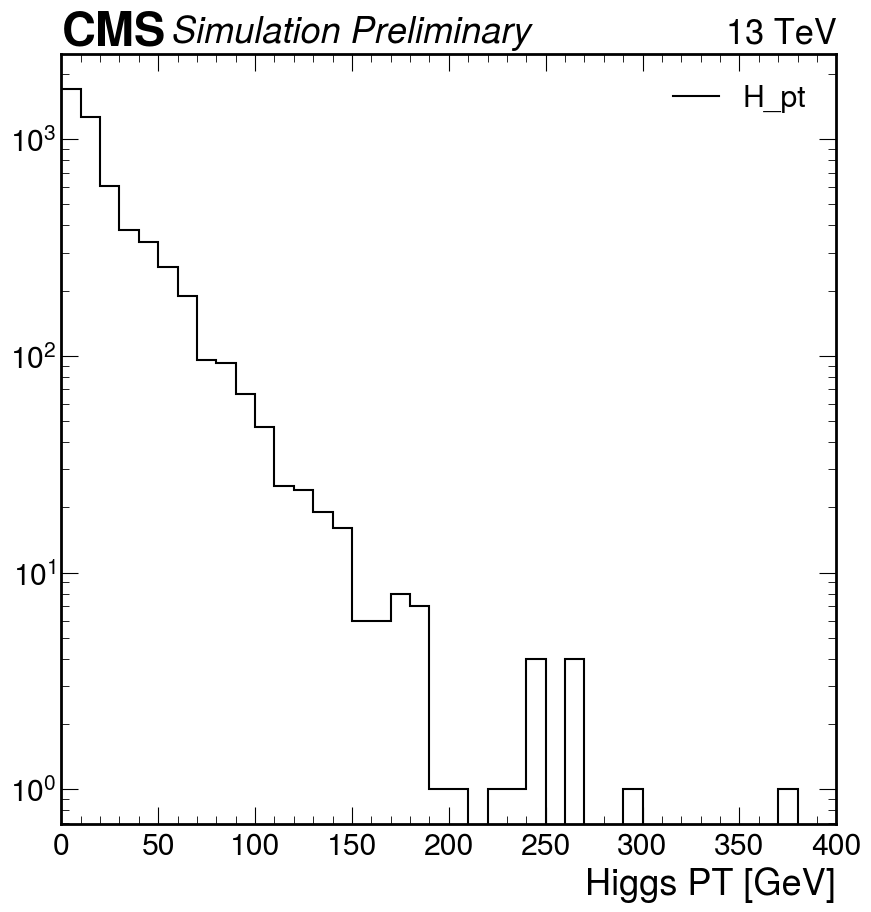

In [309]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["h_pt"].plot1d(ax=ax,histtype='step',color="black")
ax.legend(title="")
ax.set_yscale("log")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("Higgs PT [GeV]")
plt.xlim(0,400)

(7.9, 8.2)

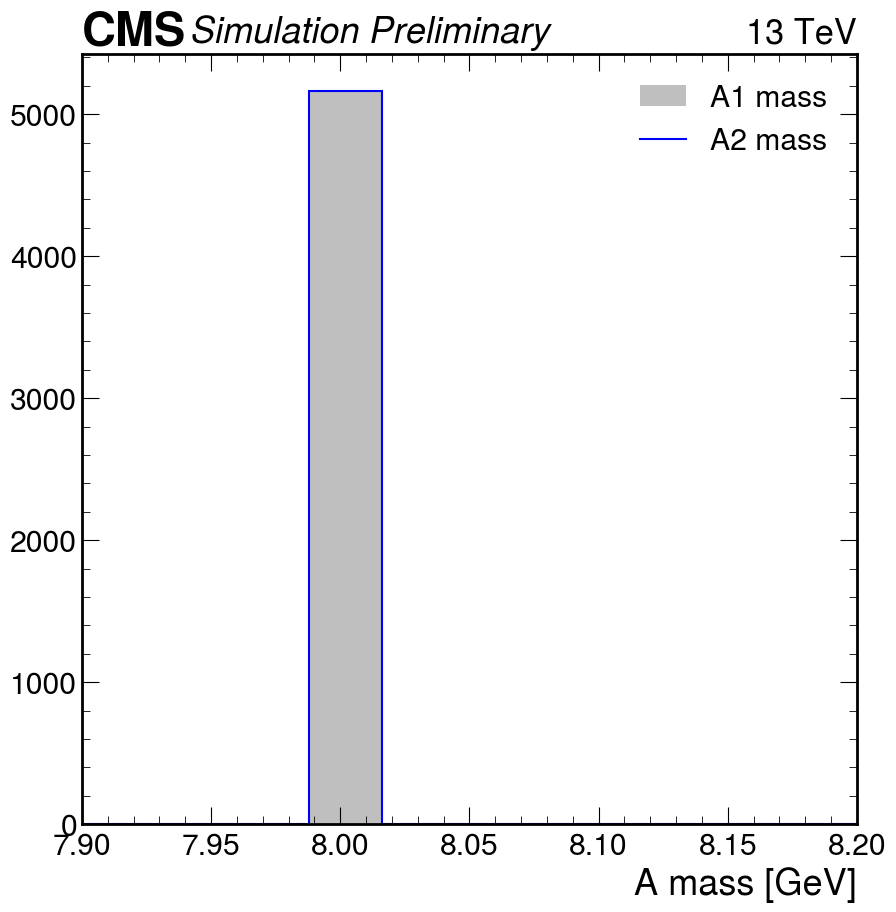

In [310]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["a1_mass"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["a2_mass"].plot1d(ax=ax,histtype='step',color="b")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("A mass [GeV]")
plt.xlim(7.9,8.2)

(0.0, 250.0)

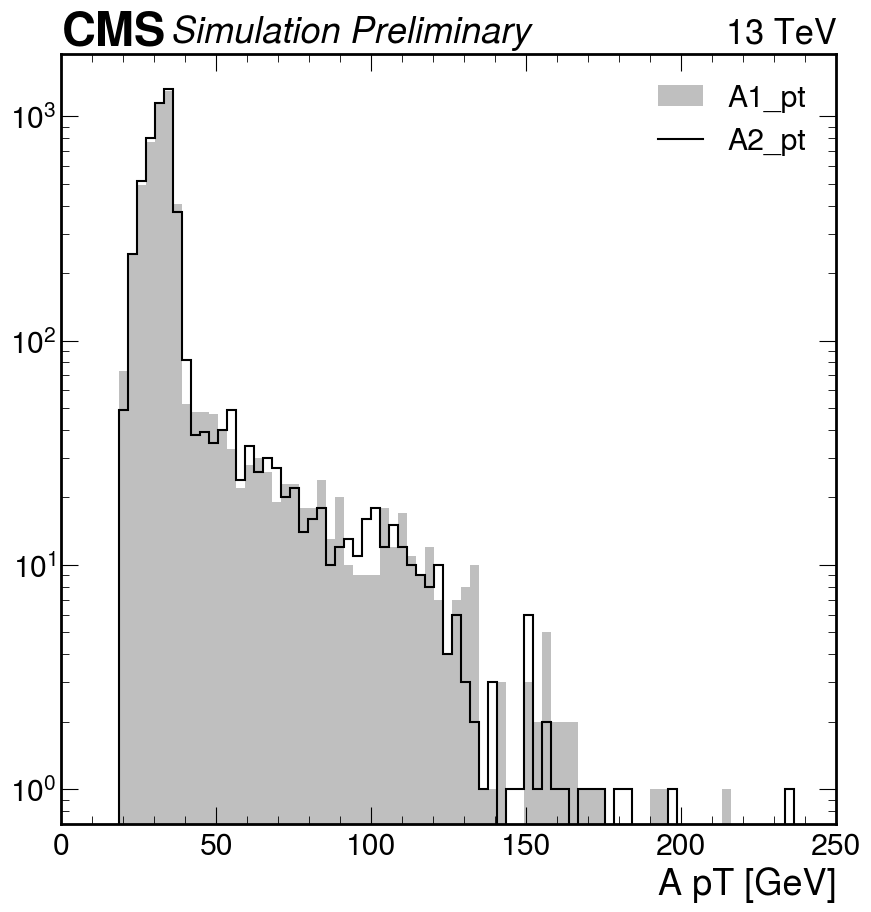

In [311]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["a1_pt"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["a2_pt"].plot1d(ax=ax,histtype='step',color="black")
ax.legend(title="")
ax.set_yscale("log")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("A pT [GeV]")
plt.xlim(0,250)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

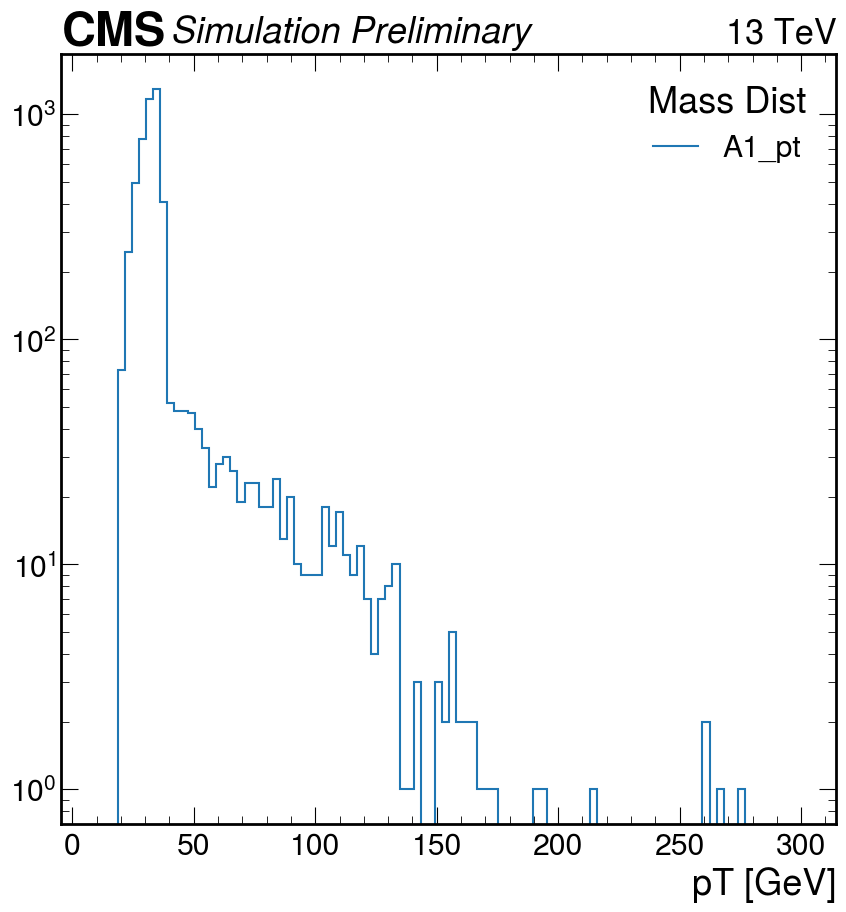

In [312]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["a1_pt"].plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(0.0, 200.0)

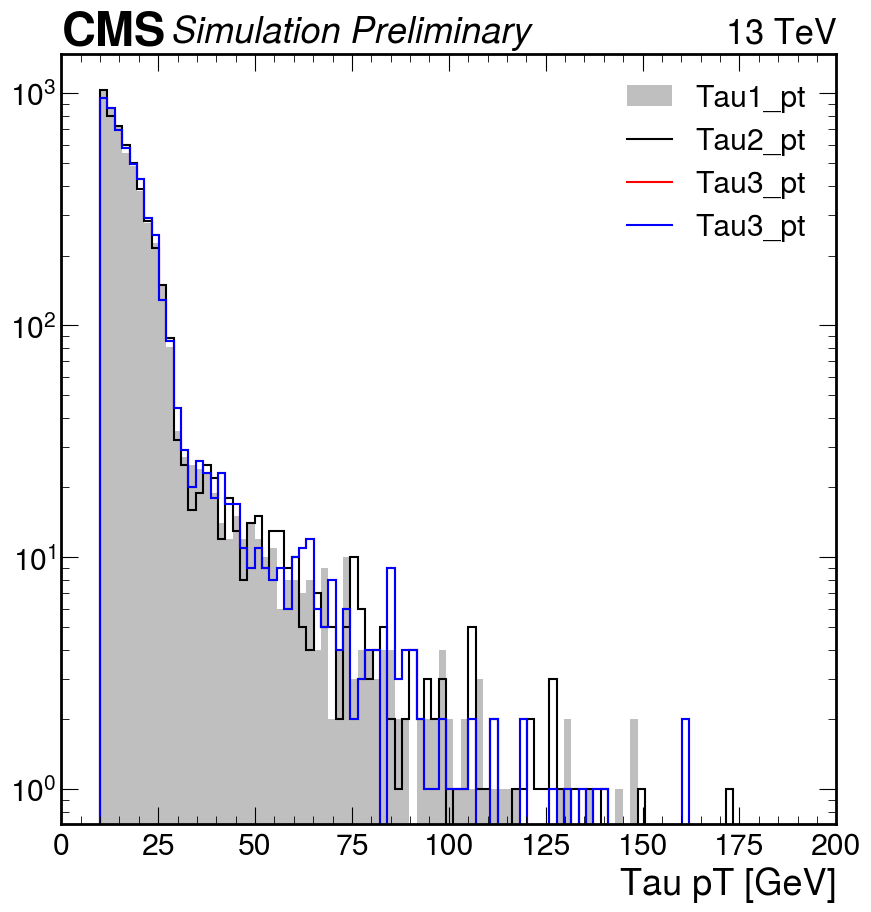

In [313]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["tau1_pt"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["tau3_pt"].plot1d(ax=ax,histtype='step',color="r")
out["unboosted_signal_M8"]["tau3_pt"].plot1d(ax=ax,histtype='step',color="b")
ax.legend(title="")
ax.set_yscale("log")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("Tau pT [GeV]")
plt.xlim(0,200)

Text(1, 0, 'eta')

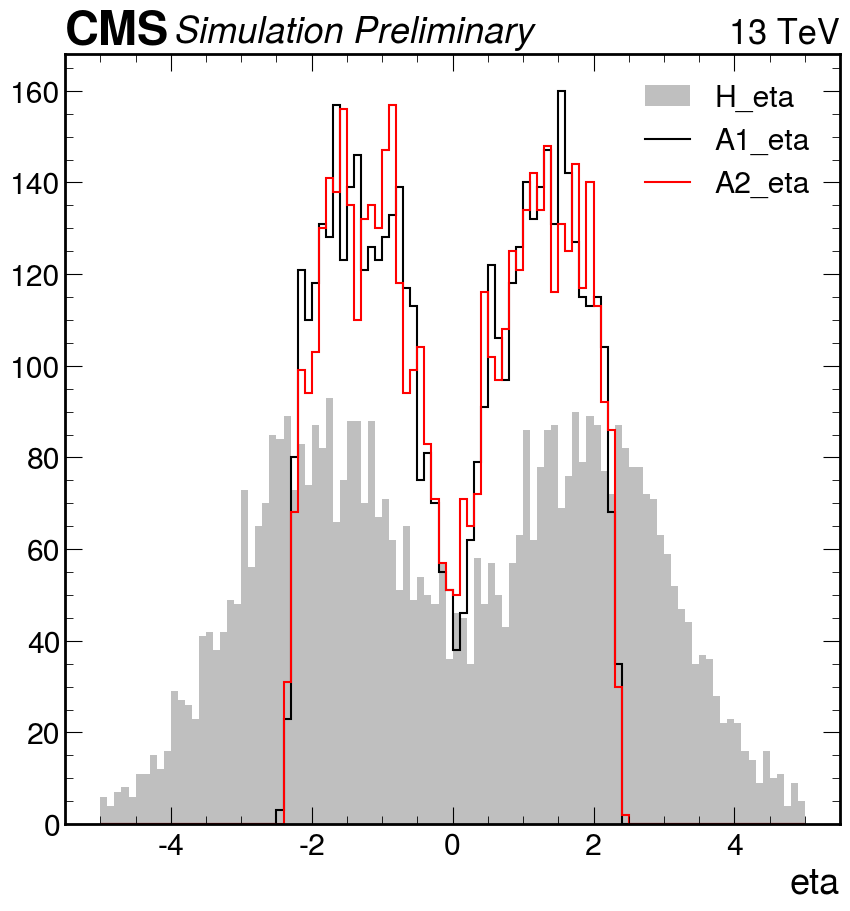

In [314]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["h_eta"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["a1_eta"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["a2_eta"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("eta")

Text(1, 0, 'phi')

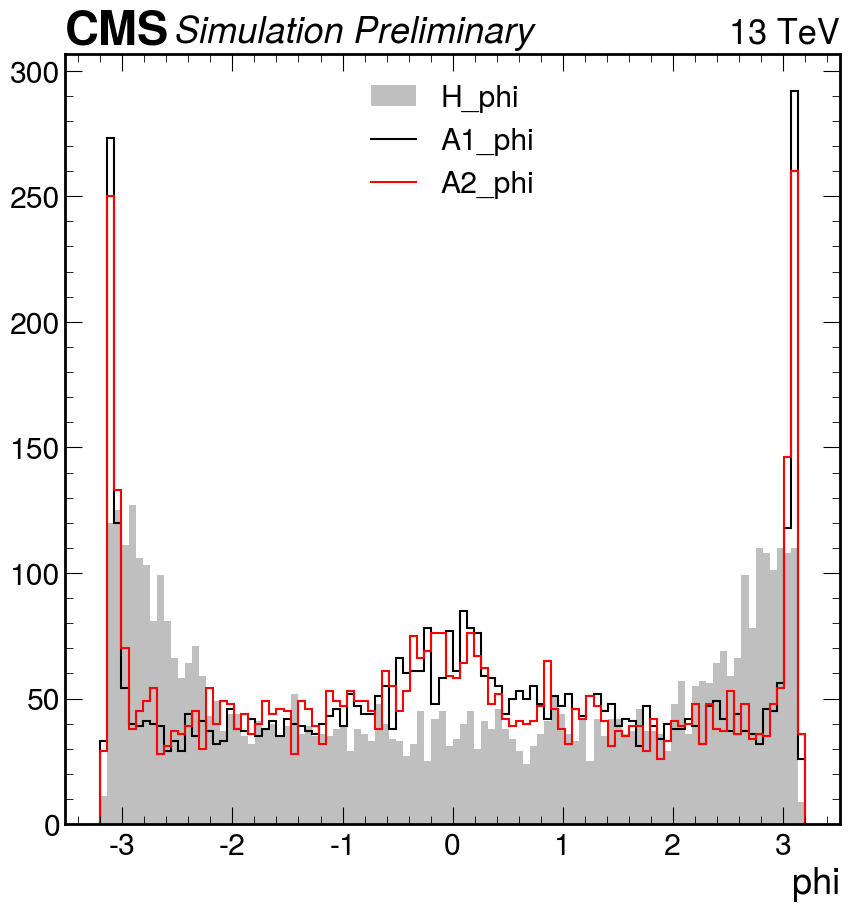

In [315]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["h_phi"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["a1_phi"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["a2_phi"].plot1d(ax=ax,histtype='step',color="r")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("phi")

(-4.0, 4.0)

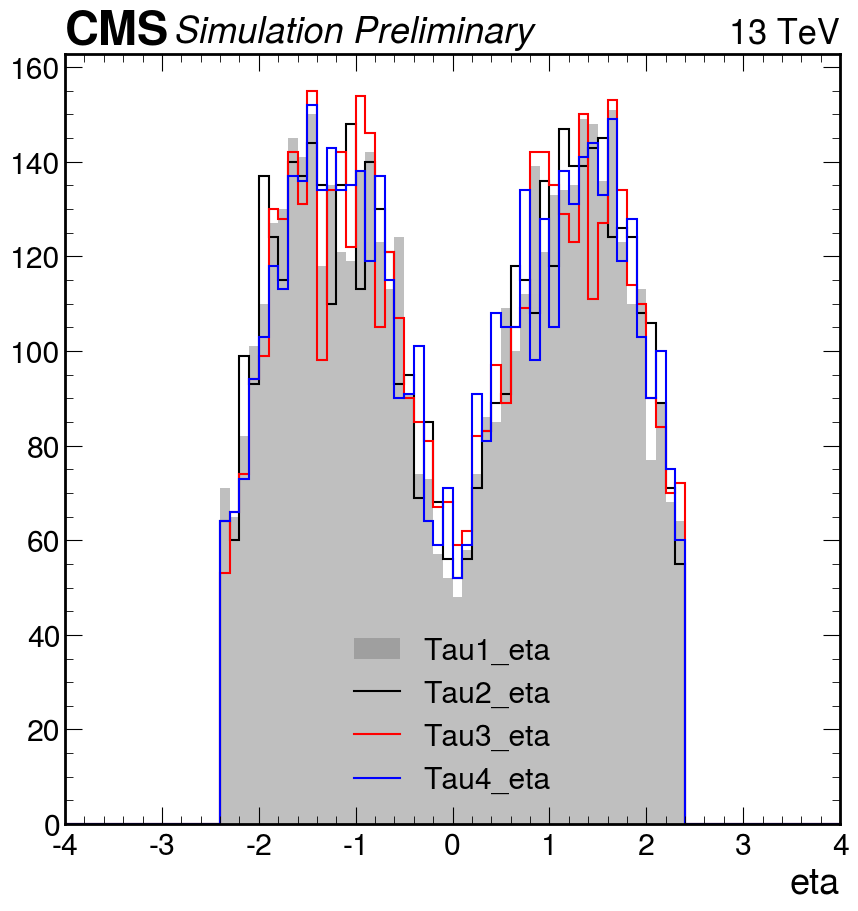

In [316]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["tau1_eta"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["tau2_eta"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["tau3_eta"].plot1d(ax=ax,histtype='step',color="r")
out["unboosted_signal_M8"]["tau4_eta"].plot1d(ax=ax,histtype='step',color="b")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("eta")
plt.xlim(-4,4)

Text(1, 0, 'phi')

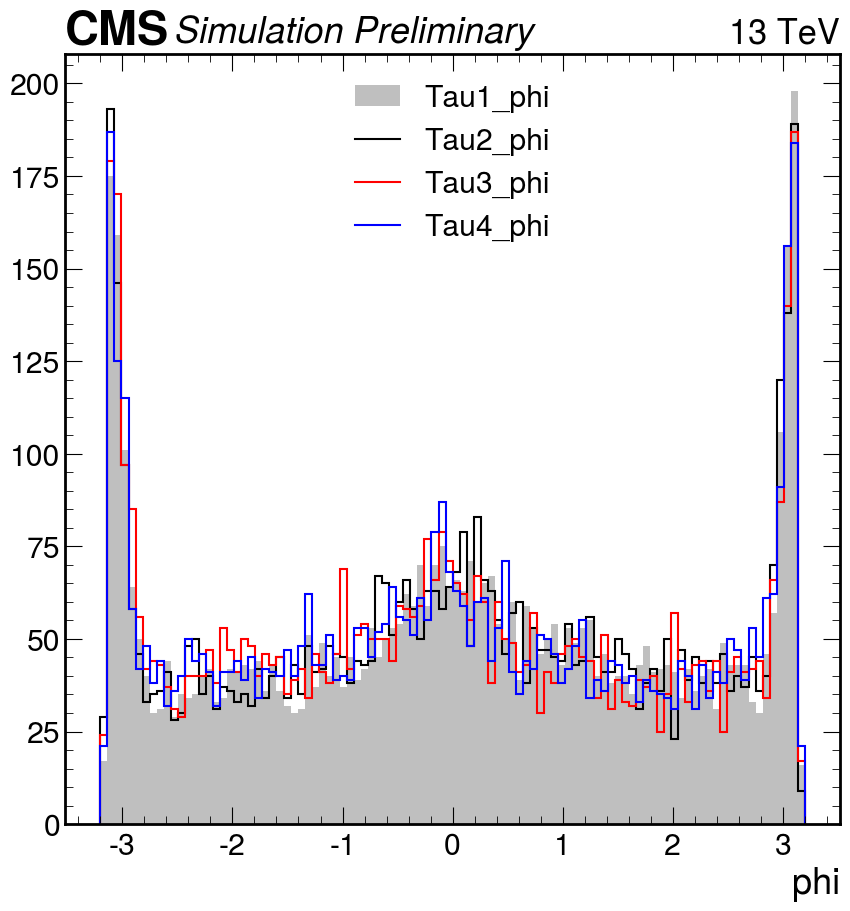

In [317]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["tau1_phi"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["tau2_phi"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["tau3_phi"].plot1d(ax=ax,histtype='step',color="r")
out["unboosted_signal_M8"]["tau4_phi"].plot1d(ax=ax,histtype='step',color="b")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("phi")


(0.0, 0.5)

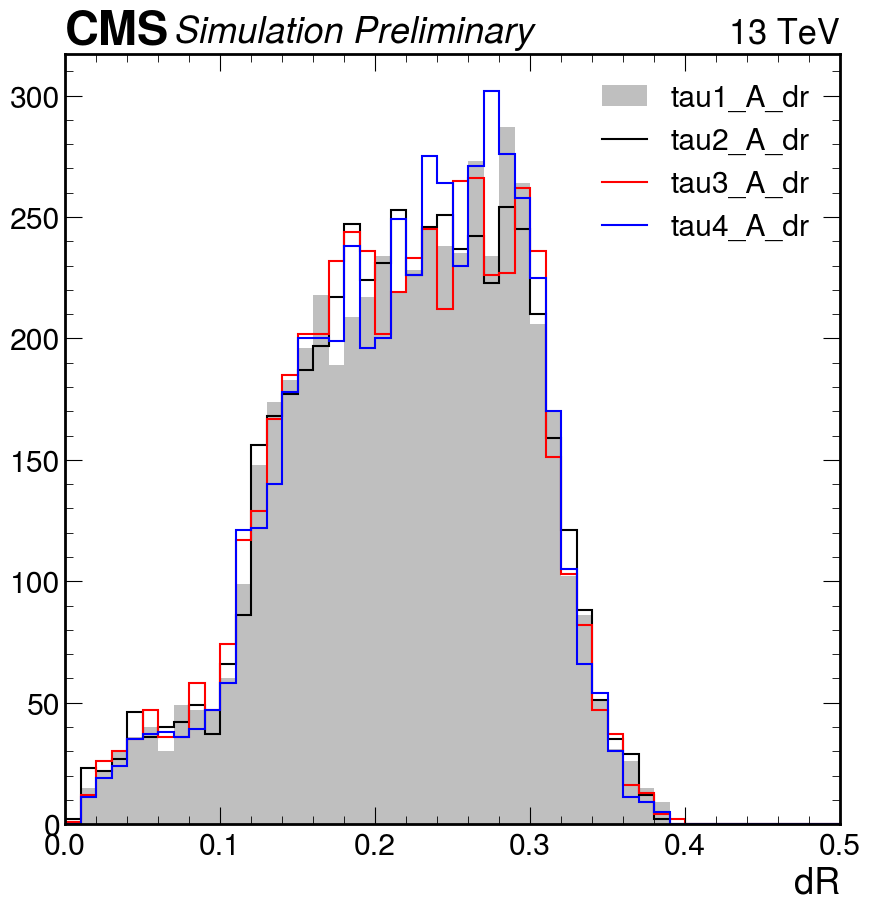

In [333]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["tau1_a1_dr"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["tau2_a1_dr"].plot1d(ax=ax,histtype='step',color="black")
out["unboosted_signal_M8"]["tau3_a2_dr"].plot1d(ax=ax,histtype='step',color="r")
out["unboosted_signal_M8"]["tau4_a2_dr"].plot1d(ax=ax,histtype='step',color="b")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("dR")
plt.xlim(0,0.5)

Text(1, 0, 'dR')

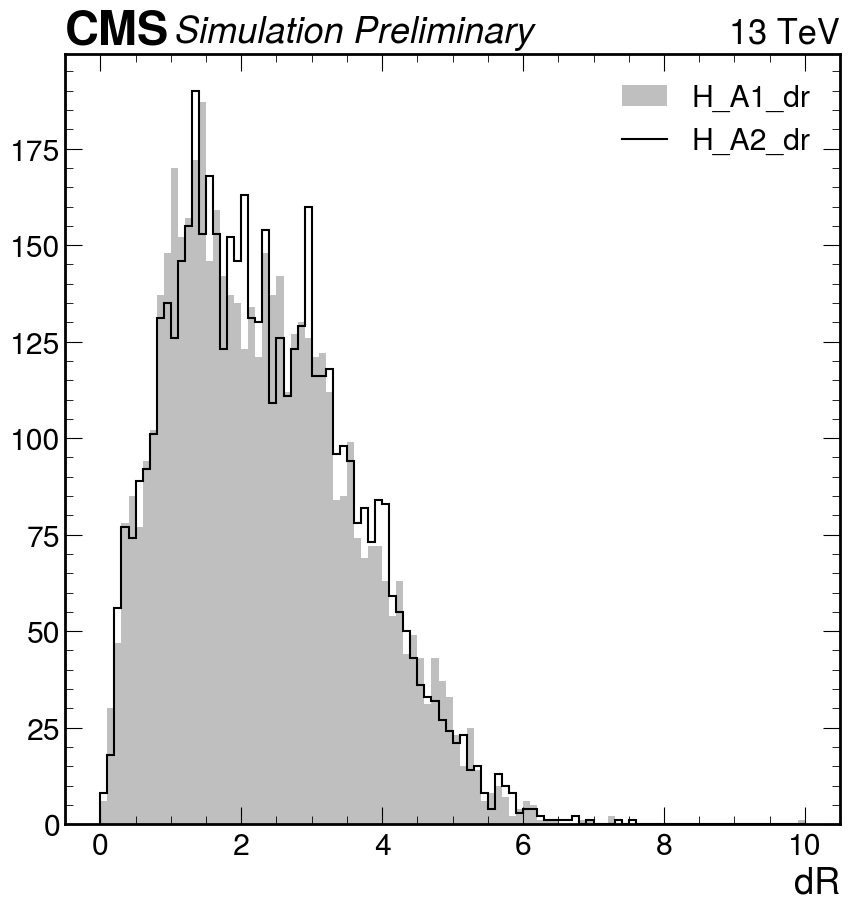

In [339]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["h_a1_dr"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["h_a2_dr"].plot1d(ax=ax,histtype='step',color="black")
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("dR")

(0.0, 1.0)

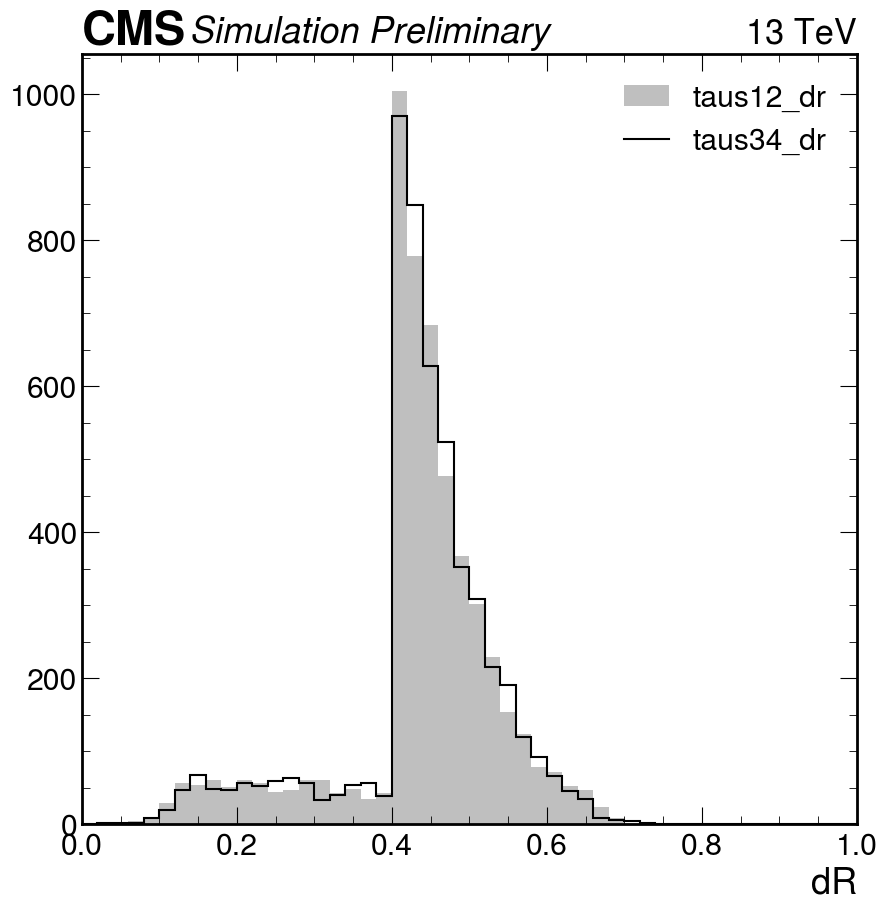

In [345]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["taus12_dr"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
out["unboosted_signal_M8"]["taus34_dr"].plot1d(ax=ax,histtype='step',color="black")

ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("dR")
plt.xlim(0,1)

(0.0, 5.0)

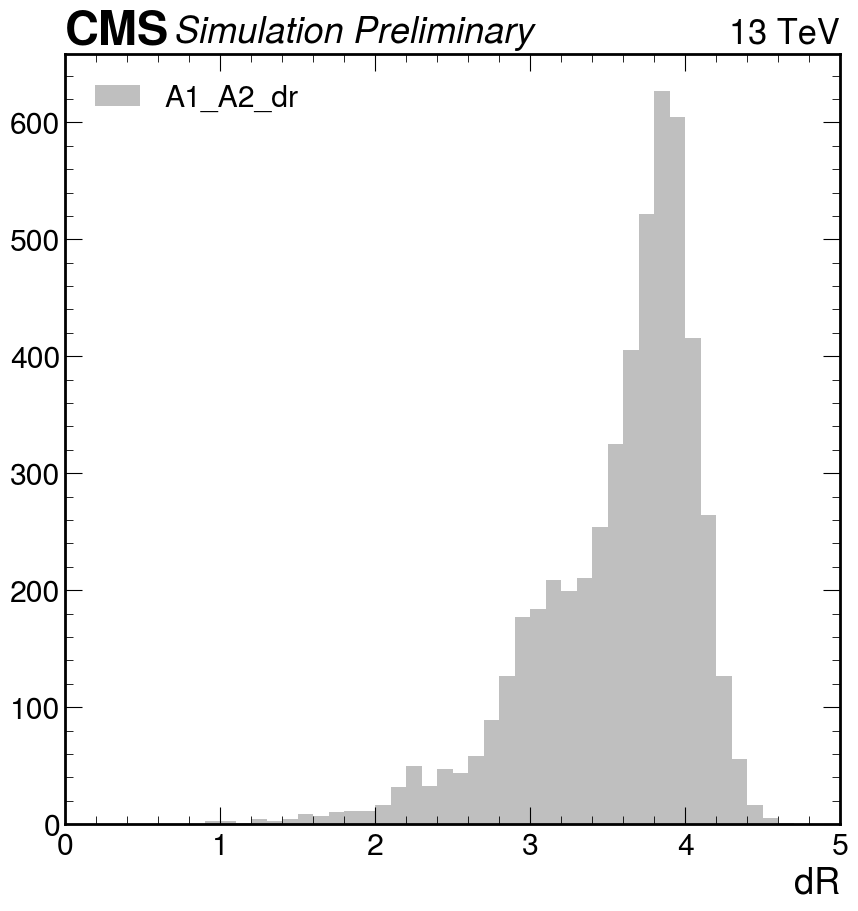

In [346]:
fig, ax = plt.subplots()
out["unboosted_signal_M8"]["a1_a2_dr"].plot1d(ax=ax,color='grey',alpha=0.5,histtype='fill')
ax.legend(title="")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.xlabel("dR")
plt.xlim(0,5)

Text(1, 0, 'ΔΦ')

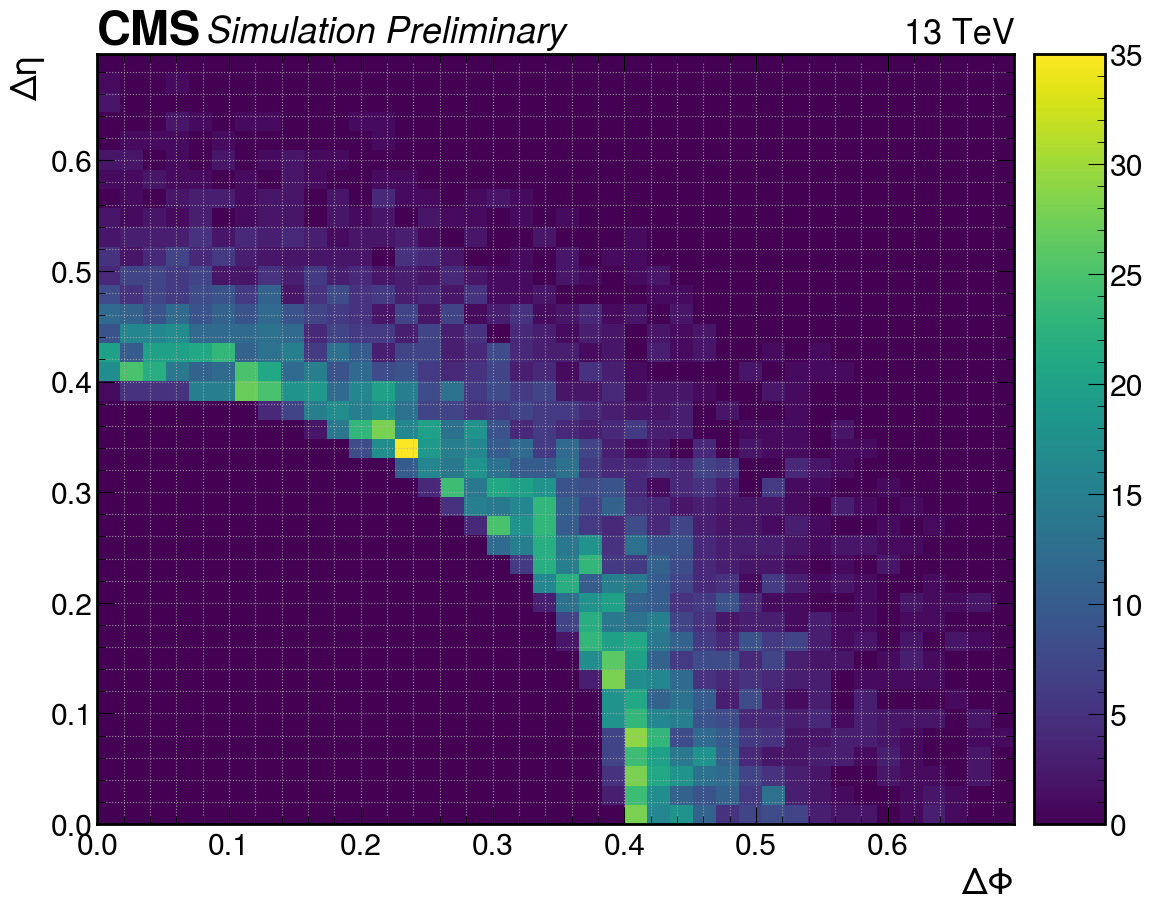

In [322]:
fig, ax = plt.subplots(figsize=(13,10))
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 500, vcenter=250)
out["unboosted_signal_M8"]["tau12_deta_dphi"].plot2d()
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 200, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")

Text(1, 0, 'ΔΦ')

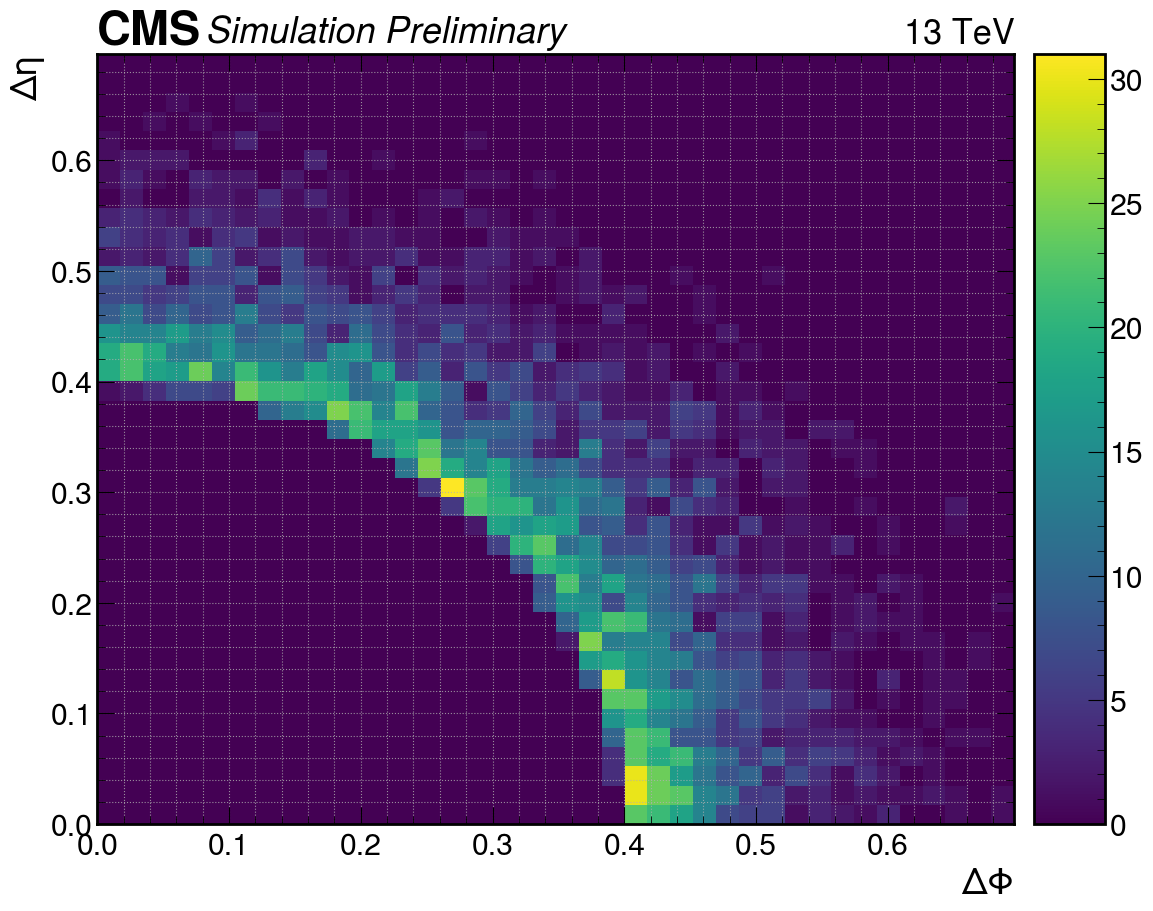

In [347]:
fig, ax = plt.subplots(figsize=(13,10))
mcolors.TwoSlopeNorm(vmin=0, vmax = 400, vcenter=200)
out["unboosted_signal_M8"]["tau34_deta_dphi"].plot2d(ax=ax)
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 200, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

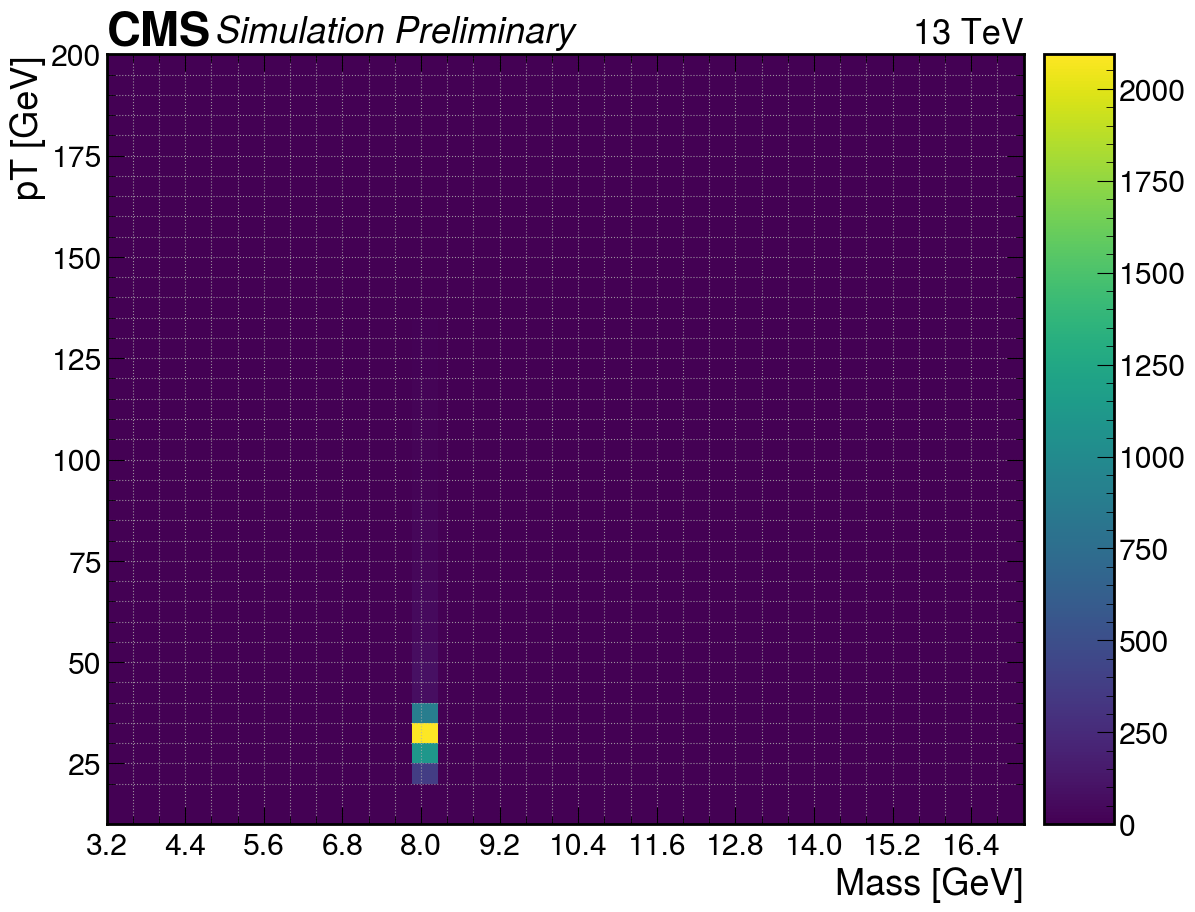

In [324]:
fig, ax = plt.subplots(figsize=(13,10))
out["unboosted_signal_M8"]["a1_mass_pt"].plot2d()
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
ax.set_yticks(np.arange(20, 200, 5), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

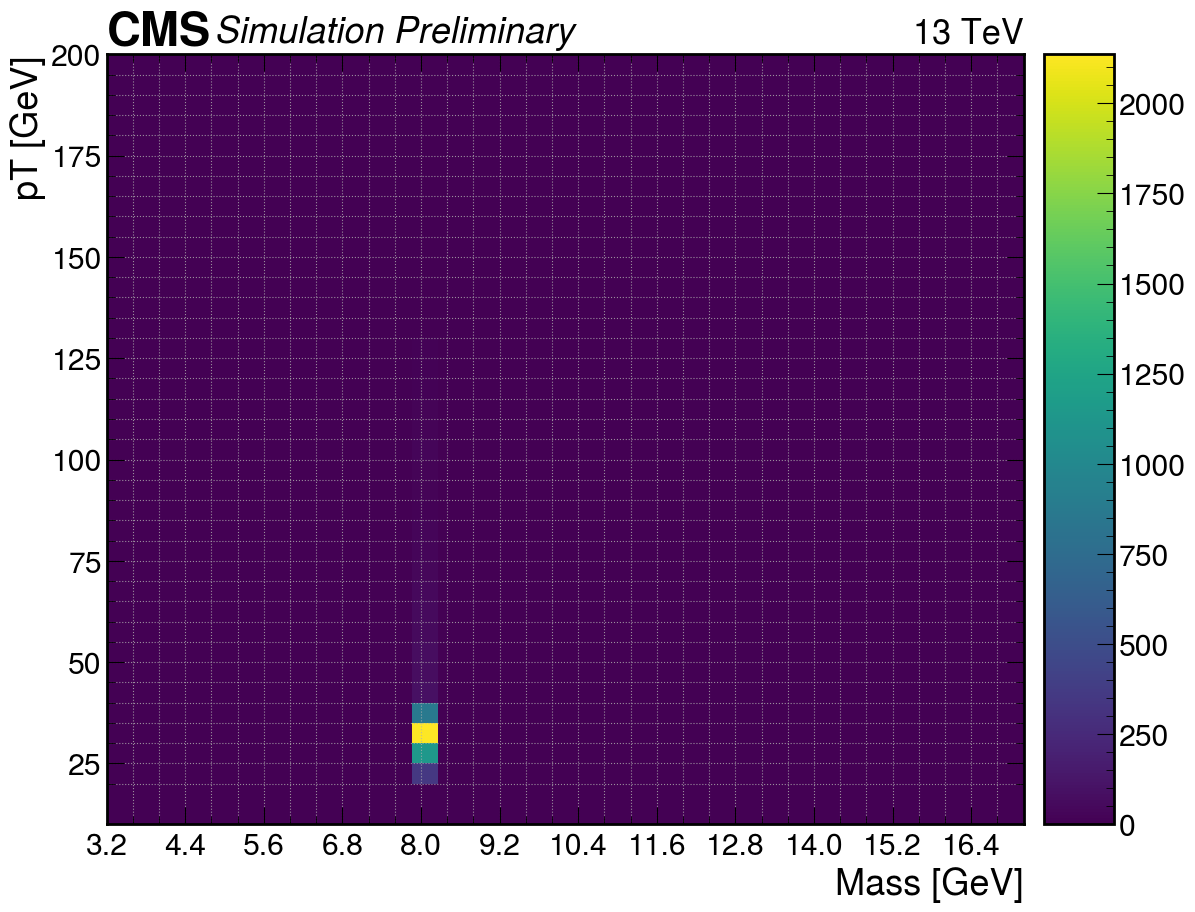

In [325]:
fig, ax = plt.subplots(figsize=(13,10))
out["unboosted_signal_M8"]["a2_mass_pt"].plot2d()
ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
ax.set_yticks(np.arange(20, 200, 5), minor=True)
plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)